<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Diplomado_Ciencia_de_Datos/blob/main/metodos_supervisados/ensamble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Autor: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align = 'center'> Métodos de ensamble </h1>

Los métodos de ensamble en el aprendizaje automático combinan múltiples modelos base para mejorar la precisión y la robustez de las predicciones. Hay dos enfoques principales: el ensamble por promedio, donde se combinan las predicciones de varios modelos para obtener una respuesta final, y el ensamble por votación, donde cada modelo base emite su propia predicción y la decisión final se toma por mayoría o promedio ponderado. Ejemplos comunes incluyen Bagging, que utiliza múltiples instancias de un mismo algoritmo entrenadas en diferentes subconjuntos de datos, y Boosting, que entrena iterativamente modelos débiles para corregir los errores de los anteriores. Los métodos de ensamble son poderosos porque pueden capturar la complejidad inherente en los datos al aprovechar las fortalezas de diferentes modelos, lo que a menudo resulta en un rendimiento superior en comparación con un solo modelo.

**Tipos de Métodos de Ensamble:**

Existen varios tipos de métodos de ensamble, cada uno con sus propias características y ventajas:

1. **Bagging (Bootstrap Aggregating):** Bagging es un método que se basa en la idea de generar múltiples conjuntos de datos de entrenamiento mediante muestreo con reemplazo (bootstrap) y entrenar un modelo base en cada uno de estos conjuntos. Luego, las predicciones de todos los modelos base se combinan mediante votación (en el caso de clasificación) o promedio (en el caso de regresión) para producir la predicción final. Ejemplos de algoritmos basados en bagging incluyen Random Forest.

2. **Boosting:** Boosting es un enfoque secuencial donde cada modelo base se entrena para corregir los errores del modelo anterior. Los modelos base se ponderan en función de su desempeño en los datos de entrenamiento, dándole más peso a aquellos modelos que cometieron errores significativos.

**Diagrama de ensamble para problema de regresión**
<img src='img/ensamble_reg.png'>

**Diagrama de ensamble para problema de clasificación**
<img src='img/ensamble_clf.png'>

**Ventajas de los Métodos de Ensamble:**

1. **Mejora de la Precisión:** Los métodos de ensamble tienden a producir modelos finales con mejor precisión predictiva en comparación con los modelos individuales en los que se basan.

2. **Robustez:** Al combinar múltiples modelos, los métodos de ensamble pueden ser más robustos ante el ruido en los datos y menos propensos al sobreajuste en comparación con un solo modelo.

3. **Manejo de Datos Desbalanceados:** Los métodos de ensamble pueden ser efectivos para abordar problemas de clasificación con clases desbalanceadas, ya que pueden compensar el sesgo hacia las clases dominantes mediante la combinación de múltiples modelos.

4. **Interpretabilidad:** Algunos métodos de ensamble, como Random Forest, proporcionan medidas de importancia de características que pueden ayudar a interpretar cómo se están tomando las decisiones en el modelo final.

**Consideraciones al Usar Métodos de Ensamble:**

1. **Computacionalmente Costoso:** Entrenar múltiples modelos base y combinar sus predicciones puede ser computacionalmente costoso, especialmente para conjuntos de datos grandes.

2. **Hiperparámetros:** Los métodos de ensamble tienen sus propios hiperparámetros que deben ajustarse correctamente para lograr el mejor rendimiento, lo que puede requerir más tiempo y esfuerzo de ajuste en comparación con los modelos individuales.

3. **Interpretabilidad:** A medida que aumenta la complejidad del método de ensamble, la interpretación del modelo final puede volverse más desafiante, especialmente en comparación con modelos más simples como la regresión lineal.

<h2> Modelo matemático </h2>

Consideremos el siguiente problema de regresión: sea  $f(\mathbf{x})$ la función que queremos predecir, donde $x$ representa las características de entrada y $y$ representa las etiquetas verdaderas. Supongamos que tenemos un conjunto de datos de entrenamiento 

$$D = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ..., (\mathbf{x}_n, y_n)\}$$

Ahora, vamos a definir un modelo débil $h(\mathbf{x})$ que es capaz de aproximarse a la función $f(\mathbf{x})$ con cierto error, es decir, $h(\mathbf{x}) \approx f(\mathbf{x}) + \epsilon $, donde $\epsilon$ es el error del modelo. 

El objetivo de los métodos de ensamble es combinar múltiples modelos débiles $h_{1}(\mathbf{x}), h_2(\mathbf{x}), ..., h_m(\mathbf{x})$ para obtener una predicción más precisa $F(x)$. Esta predicción se puede calcular como:

$$F(\mathbf{x}) = \alpha_1 h_1(\mathbf{x}) + \alpha_2 h_2(\mathbf{x}) + ... + \alpha_m h_m(\mathbf{x})$$

Donde $\alpha_1, \alpha_2, ..., \alpha_m $ son los pesos asignados a cada modelo débil, que pueden ser iguales o diferentes. 

<h2> Ejemplos de clasificador por votos </h2>

In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer = load_breast_cancer(as_frame=True)

In [4]:
cancer_df = pd.DataFrame(breast_cancer['data'], 
                         columns = breast_cancer['feature_names'])


In [5]:
x_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
X = cancer_df[x_cols]
y = breast_cancer['target']
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
models = [
    ('lr', LogisticRegression()), 
    ('knn', KNeighborsClassifier(n_neighbors=5)), 
    ('svc', SVC())
]

voting_clf = VotingClassifier(
    estimators=models
)

In [8]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()), ('svc', SVC())])

In [9]:
y_pred = voting_clf.predict(X_test)

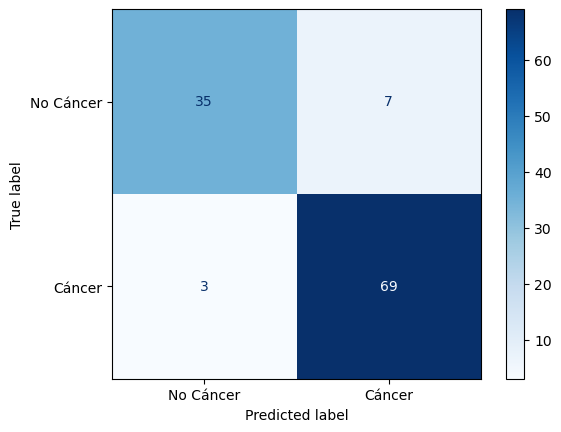

In [10]:
disp = ConfusionMatrixDisplay.from_estimator(
    voting_clf,
    X_test,
    y_test,
    display_labels=['No Cáncer', 'Cáncer'],
    cmap=plt.cm.Blues,
)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.88        42
           1       0.91      0.96      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [12]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.9210526315789473
knn = 0.8947368421052632
svc = 0.8947368421052632


In [13]:
param_grid = {
    'knn__n_neighbors': [3, 5, 11, 20],  # Hyperparameters for KNN
    'svc__C': [0.1, 1.0, 10.0],  # Hyperparameters for SVC
    'svc__kernel': ['linear', 'poly', 'rbf'],
    'svc__degree': [2, 3, 5]
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=5)

In [16]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression()),
                                                    ('knn',
                                                     KNeighborsClassifier()),
                                                    ('svc', SVC())]),
             param_grid={'knn__n_neighbors': [3, 5, 11, 20],
                         'svc__C': [0.1, 1.0, 10.0], 'svc__degree': [2, 3, 5],
                         'svc__kernel': ['linear', 'poly', 'rbf']})

In [17]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [18]:
print("Mejores parámetros:", best_params)
print("Mejor exactitud:", best_score)

Mejores parámetros: {'knn__n_neighbors': 3, 'svc__C': 0.1, 'svc__degree': 2, 'svc__kernel': 'linear'}
Mejor exactitud: 0.9076923076923078


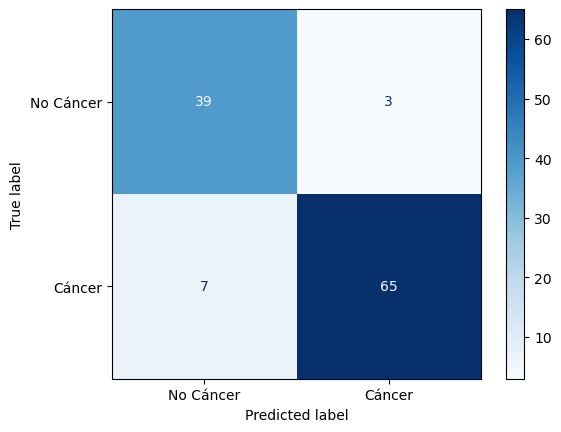

In [19]:
disp = ConfusionMatrixDisplay.from_estimator(
    grid_search,
    X_test,
    y_test,
    display_labels=['No Cáncer', 'Cáncer'],
    cmap=plt.cm.Blues,
)

<h2> Bosques aleatorios </h2>

El modelo de bosques aleatorios (Random Forest, en inglés) corresponde a un modelo ensamblado para árboles de decisión.

<img src = 'img/RF.png'>

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)

In [22]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [23]:
y_pred = clf.predict(X_test)

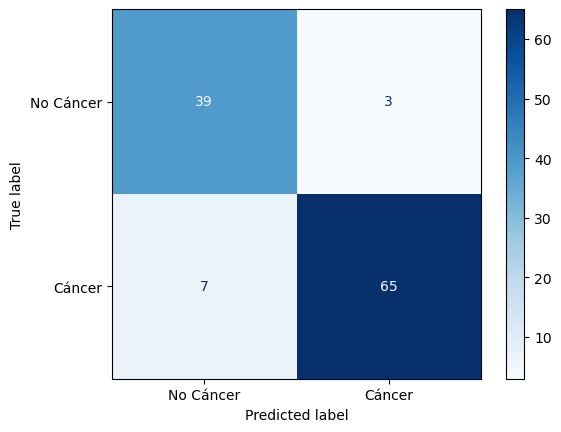

In [24]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=['No Cáncer', 'Cáncer'],
    cmap=plt.cm.Blues,
)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

